In [1]:
import warnings
warnings.filterwarnings(action='ignore')

```
News from BBC:
https://www.bbc.com/news/health-55308211       
14 December, 2020

Health Secretary Matt Hancock said at least 60 different local authorities had recorded Covid infections caused by the new variant.
...

```
<font size=+1>
    <b>Abstract</b> <br>
    The Covid-19 pandemic is the most crucial health disaster that has surrounded the world last year. Here, we will explore some interesting progress in public healthy policies from data science which include
    
- data collection, extraction, and washing
- [Basic ARIMA model Introduction](#ARIMA($p,d,q$))
- [variant covid virus dating](#Variant-COVID-19-in-UK), including lppls, changefinder etc.
- [SIR-F model building and $R_t$ estimation](#covsirphy),

In this topic, we also introduce some up-to-date visualization, alogrithms, and some mathematical techniques and packages in Python world.
       
</font>    

1. https://blog.csdn.net/deephub/article/details/105788097
2. https://github.com/midas-network/COVID-19

- [COVID 19 Database](#COVID-19-Database)
- [Stationary Test](#Stationary-Test)
- [ARIMA Model](#First-ARIMA-Model)
- [Variant COVID-19](#Variant-COVID-19-in-UK)
- [TCN Model](#TCN)


In [1]:
import pandas as pd
import numpy as np
import wget
import os

from termcolor import colored

import plotly.express as ex
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
#from causalimpact import CausalImpact

COVID 19 Database
---
Download Data from below, JHU,  if necessary:

In [2]:
# url of the raw csv dataset
#if if not os.path.exists('data'):
#    os.makedirs('data')

files=['time_series_covid19_confirmed_global.csv',\
       'time_series_covid19_deaths_global.csv',\
       'time_series_covid19_recovered_global.csv']

for f in files:
    if os.path.exists(f):
       os.remove(f)
    
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']

In [4]:
# visualisation by off-line plotly 

import plotly.offline as pyo
import plotly.express as ex

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

pyo.init_notebook_mode()

In [5]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

List all the Country in the data file,

In [6]:
confirmed_df['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chi

Some data in country had recorded in different regions; Thus sum up all data of the same Country/Region in one row:

In [7]:
confirmed_df[confirmed_df['Country/Region']=='United Kingdom']

Province/State  Country/Region        Lat  \
253                                      Anguilla  United Kingdom  18.220600   
254                                       Bermuda  United Kingdom  32.307800   
255                        British Virgin Islands  United Kingdom  18.420700   
256                                Cayman Islands  United Kingdom  19.313300   
257                               Channel Islands  United Kingdom  49.372300   
258                   Falkland Islands (Malvinas)  United Kingdom -51.796300   
259                                     Gibraltar  United Kingdom  36.140800   
260                                   Isle of Man  United Kingdom  54.236100   
261                                    Montserrat  United Kingdom  16.742498   
262  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
263                      Turks and Caicos Islands  United Kingdom  21.694000   
264                                           NaN  United Kingdom  55.378100   

          Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
253 -63.068600        0        0        0        0        0        0  ...   
254 -64.750500        0        0        0        0        0        0  ...   
255 -64.640000        0        0        0        0        0        0  ...   
256 -81.254600        0        0        0        0        0        0  ...   
257  -2.364400        0        0        0        0        0        0  ...   
258 -59.523600        0        0        0        0        0        0  ...   
259  -5.353600        0        0        0        0        0        0  ...   
260  -4.548100        0        0        0        0        0        0  ...   
261 -62.187366        0        0        0        0        0        0  ...   
262 -14.355900        0        0        0        0        0        0  ...   
263 -71.797900        0        0        0        0        0        0  ...   
264  -3.436000        0        0        0        0        0        0  ...   

     2/23/21  2/24/21  2/25/21  2/26/21  2/27/21  2/28/21   3/1/21   3/2/21  \
253       18       18       18       18       18       18       18       18   
254      703      703      705      705      705      705      707      713   
255      114      114      114      153      153      153      153      153   
256      431      431      438      444      444      444      447      447   
257     4030     4031     4032     4033     4034     4038     4038     4039   
258       54       54       54       54       54       54       54       54   
259     4234     4234     4235     4236     4238     4239     4239     4243   
260      462      470      475      475      484      484      486      494   
261       20       20       20       20       20       20       20       20   
262        4        4        4        4        4        4        4        4   
263     2051     2051     2070     2088     2099     2114     2114     2115   
264  4134639  4144577  4154562  4163085  4170519  4176554  4182009  4188400   

      3/3/21   3/4/21  
253       18       18  
254      713      718  
255      153      153  
256      447      448  
257     4040     4041  
258       54       54  
259     4243     4243  
260      511      546  
261       20       20  
262        4        4  
263     2132     2161  
264  4194785  4201358  

[12 rows x 412 columns]

In [10]:
def df_earth(df,title="COVID 19 Confirmed Cases"):
   df_=df.copy()
   df_ = df_.rename(columns= {"Country/Region" : "Country", "Province/State": "Province"})

   date=df_.columns[-1]
   fig = go.Figure(data = go.Scattergeo(
         lon = df_["Long"],
         lat = df_["Lat"],
         text = df_['Province'] + " " + df_[date].astype(str),
         mode = "markers",
         marker = dict(
                  size = 12,
                  opacity = 0.8,
                  reversescale = True,
                  autocolorscale = True,
                  symbol = 'square',
                  line = dict(width = 1,color = 'rgba(102, 102, 102)'),
                  cmin = 0,
                  color = df_[date],
                  cmax = df_[date].max(),
                  colorbar_title = "COVID 19 Reported Cases"
                 )
   ))

   fig.update_layout(
       title = title,
       geo = dict(
             scope = "world",
             showland = True,
       )
   )
   fig.show()

In [11]:
title="CovID 19 Confirmed Cases in UK"
df_uk=confirmed_df[confirmed_df['Country/Region']=='United Kingdom'].copy()
df_earth(df_uk,title=title)

In [12]:
# Grouped cases by same country

confirmed_df_g=confirmed_df.groupby('Country/Region').sum()

deaths_df_g=deaths_df.groupby('Country/Region').sum()

In [13]:
# Get Comfirmed data

countries={'UK':'United Kingdom','FR':'France','US':'US','IT':'Italy'}

date=confirmed_df_g.columns[2:]
df=pd.DataFrame(index=date)

for i,(key,val) in enumerate(countries.items()):
    #
    cases=confirmed_df_g[confirmed_df_g.index==val].values[0,2:]
    df[key]=cases.astype(int)
    

In [15]:
# Convert the datatime formate

df.index = pd.to_datetime(df.index)


In [16]:
df.tail()

UK       FR        US       IT
2021-02-28  4188827  3815639  28578548  2925265
2021-03-01  4194289  3820369  28637313  2938371
2021-03-02  4200700  3843241  28694071  2955434
2021-03-03  4207120  3870144  28759980  2976274
2021-03-04  4213764  3895430  28827144  2999119

In [17]:
#df_US.plot()
ex.line(df)

ARIMA($p,d,q$)
---
ARIMA model is named for the AutoRegressive Integrated Moving Average Model; and is expressed as the following form:
\begin{eqnarray}
\triangle^d y_t &=& \beta_1\triangle^dy_{t-1}+\beta_2\triangle^dy_{t-2}+\cdots+\beta_p\triangle^dy_{t-p} \text{ (AR part)}\\
    && \\
    && +\epsilon_t+\alpha_1\epsilon_{t-1}+\cdots+\alpha_1\epsilon_{t-q} \text{ (MA part)}\\
\end{eqnarray}

where $\epsilon_i$ is the previous $i$-days error terms and the difference is the following relation:
$$\triangle y_i=y_i-y_{i-1},\triangle^2 y_i=\triangle y_i-\triangle y_{i-1},\cdots$$

Stationary Test
---

```No relation, no information```

Before making prediction, we apply Augmented Dickey-Fuller Test, a common statistical test used to test whether a given Time series is stationary or not on the target sataset. We can achieve this by defining the null and alternate hypothesis:
- $H_0$: Null Hypothesis: Time Series is non-stationary. It gives a time-dependent trend.
- $H_1$: Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.



Random Noise Test
---
Use Ljung-Box test whether the target data is ramdom noise;
- $H_0:$ sequence of data is random noise,
- $H_1:$ data is self-correlated.

Here, we use vizuaization to chech how better the model is. 

In [18]:
df_UK=df[['UK']].copy()

Data set follows normal distributed is the basic principle before starting to make statistical infererence over them; the following is check `the deaths data in US` whether obey the principle: 

<AxesSubplot:ylabel='Density'>

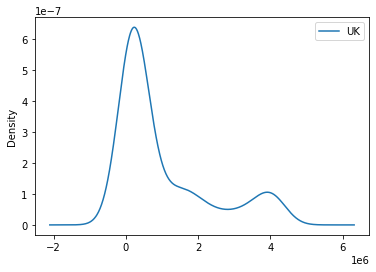

In [19]:
df_UK.plot(kind='kde')

Note: Convert it by `log(1+x)`if it is not normal:

```
df[feature] = df[feature].apply(lambda x : np.log(1+x))
```

Now the double peaks is overcome and much acceptable:

In [20]:
def adfuller_test(feature,p=0.05):
    result=adfuller(feature)
    labels = ['ADF Test Statistic','p-value','# of Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= p:
       print("Type I error: %s" %(p)) 
       print(colored("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary","red"))
    else:
       print("Type I error: %s" %(p)) 
       print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [21]:
def check_diff(df_):
    x_shift=[]
    df=df_.copy()
    x_shift.append(df[df.columns[0]][0])
    for i in range(1,5):
        print("===\nOrder of difference: ", colored(i,"blue"))
        f=df.columns[0]+"_diff_%s" %i
        df[f]=df[df.columns[i-1]].diff(1)#.cumsum()+1

        df[f][0]=x_shift[0]
        adfuller_test(df[f])
        print("===\n\n")
        i=i+1
    return df 

In [22]:
df_UK = check_diff(df_UK)

===
Order of difference:  1
ADF Test Statistic : -2.2743604903685446
p-value : 0.18037059164126606
# of Lags Used : 9
Number of Observations : 398
Type I error: 0.05
weak evidence against null hypothesis,indicating it is non-stationary 
===


===
Order of difference:  2
ADF Test Statistic : -4.2560317294172965
p-value : 0.0005288792611311087
# of Lags Used : 8
Number of Observations : 399
Type I error: 0.05
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
===


===
Order of difference:  3
ADF Test Statistic : -12.081192571856395
p-value : 2.230306873829684e-22
# of Lags Used : 9
Number of Observations : 398
Type I error: 0.05
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
===


===
Order of difference:  4
ADF Test Statistic : -11.227036084753195
p-value : 1.9489809334206536e-20
# of Lags Used : 18
Number of Observations : 389
Type I error: 0.05
strong evidence against the null hypothesis(Ho)

<ipython-input-21-e5d7ea245356>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-e5d7ea245356>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-e5d7ea245356>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-e5d7ea245356>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [24]:
df_UK.head()

UK  UK_diff_1  UK_diff_2  UK_diff_3  UK_diff_4
2020-01-22   0        0.0        0.0        0.0        0.0
2020-01-23   0        0.0        0.0        0.0        0.0
2020-01-24   0        0.0        0.0        0.0        0.0
2020-01-25   0        0.0        0.0        0.0        0.0
2020-01-26   0        0.0        0.0        0.0        0.0

Summary of ADF_test
---
1. data of confirmed cases in UK is stationary after two difference operations


<AxesSubplot:xlabel='UK_diff_2', ylabel='Count'>

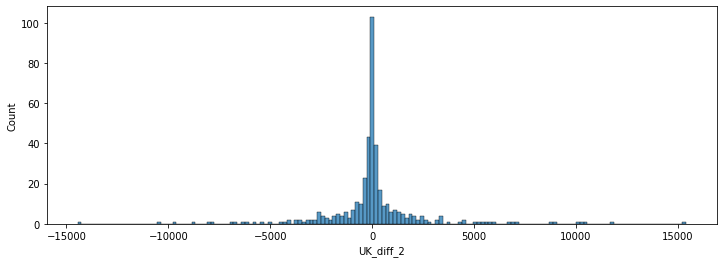

In [34]:
import seaborn as sns

ndiff=2
plt.figure(figsize=(12,4))
sns.histplot(df_UK[df_UK.columns[ndiff]])

ARIMA Model
---

In [53]:
ndiff=2
feature='UK'#df_UK.columns[ndiff]

In [36]:
import pmdarima as pm
from pmdarima.arima import auto_arima,ndiffs
from pmdarima.model_selection import train_test_split

<b>Fit the model of ARIMA`(p,d=ndiff,q)`  where `ndiff=2`.</b>


In [69]:
def train_valid_split(df_,feature=feature):
    df1=df_.copy()
    
    train_len = int(df1.shape[0] * 0.9)
    y = df1[feature].values
    train, test = train_test_split(y, train_size=train_len)
    print("size of train set: %s, and size of test set: %s," %(len(train),len(test)))
    return train,test

In [70]:
train,test = train_valid_split(df_UK,feature='UK')

size of train set: 367, and size of test set: 41,


In [73]:
arima_model = pm.auto_arima(train, d=ndiff, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=6736.126, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6770.806, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6754.918, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=6752.242, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6769.487, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=6755.257, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=6754.179, Time=0.29 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=6733.712, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=6755.198, Time=0.10 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=6740.874, Time=0.31 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=6736.192, Time=0.44 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=6734.524, Time=0.43 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=6754.257, Time=0.11 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept   : AIC=6736.084, Time=0.52 sec
 ARIMA(3,2,2)(0,0,0)[0]          

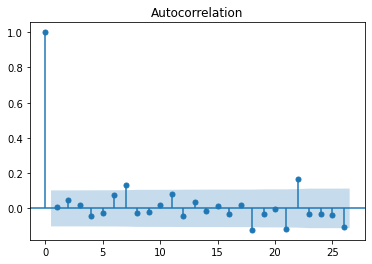

In [74]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(arima_model.resid() );

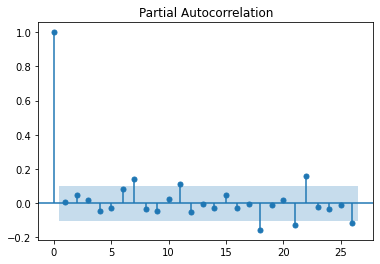

In [75]:
plot_pacf(arima_model.resid() );

In [76]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  367
Model:               SARIMAX(3, 2, 2)   Log Likelihood               -3359.856
Date:                Sat, 06 Mar 2021   AIC                           6733.712
Time:                        08:07:16   BIC                           6761.011
Sample:                             0   HQIC                          6744.561
                                - 367                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     45.2328     48.870      0.926      0.355     -50.550     141.015
ar.L1          1.2808      0.036     35.402      0.000       1.210       1.352
ar.L2         -0.6223      0.038    -16.471      0.000      -0.696      -0.548
ar.L3         -0.1178      0.034     -3.464      0.001      -0.184      -0.051
ma.L1         -1.5898      0.026    -60.237      0.000      -1.642      -1.538
ma.L2          0.9284      0.024     38.000      0.000       0.880       0.976
sigma2      6.024e+06      0.005   1.15e+09      0.000    6.02e+06    6.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2201.60
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              85.86   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  4e+23. Standard errors may be unstable.
"""

Now make the prediction over the test data set:

1. copy all the data,
2. replace the part with same size of `test` part at the end data by prediction.

In [77]:
forecasts=arima_model.predict(n_periods = len(test))
#.fo(test)

In [79]:
forecasts.astype(int)

array([3633158, 3671672, 3710038, 3748749, 3788104, 3828131, 3868624,
       3909262, 3949765, 3989994, 4029983, 4069898, 4109945, 4150279,
       4190954, 4231917, 4273046, 4314216, 4355344, 4396421, 4437497,
       4478655, 4519969, 4561478, 4603174, 4645017, 4686952, 4728938,
       4770959, 4813028, 4855177, 4897437, 4939831, 4982364, 5025021,
       5067783, 5110628, 5153548, 5196542, 5239622, 5282801])

In [82]:
df_UK['pred_ARIMA']=df_UK['UK']
df_UK['pred_ARIMA'][len(train):]=forecasts.astype(int)

<ipython-input-82-1d51e1f2c688>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
# The beginning Date of test part

varianr_date=df_UK.index[-len(test)]

Remember, the data is converted by `y=log(1+x)`; now covert it back by ` x=exp(y)-1`:

In [97]:
(p,d,q)=arima_model.order
f_=df_UK.columns[0]

fig=ex.line(
    df_UK[['UK','pred_ARIMA']],
    title='No. of Confirmed Cases in %s,Predict by ARIMA(%s,%s,%s) on size %s' %(f_,p,d,q,len(test))
)


fig.update_layout(shapes=[
    dict(
      type= 'line',
      #color='red', 
      opacity=0.4,  
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= varianr_date, x1= varianr_date
    )
])
fig.show()

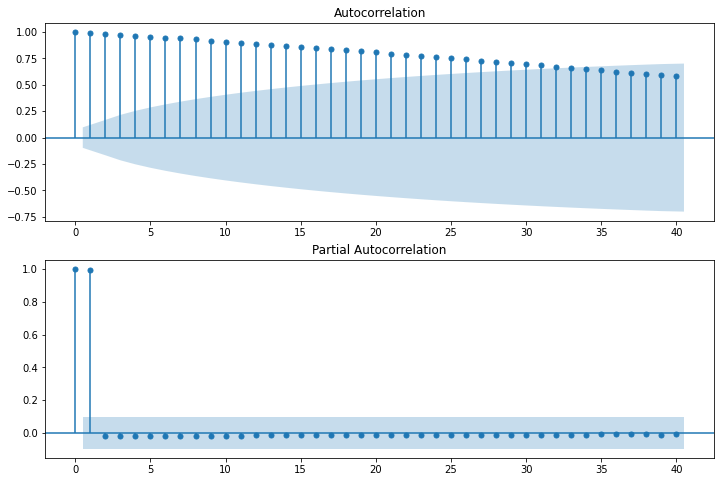

In [67]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_UK['UK'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_UK['UK'].dropna(),lags=40,ax=ax2)

In [98]:
from sklearn.metrics import mean_squared_error

def MSE(x,pred):
    error= np.abs((x-pred)/x).sum()/len(x)
    print("The Mean Square Error on test set is  %4.3f %%" %(error))

MSE(df_UK['UK'][-len(test):].values,df_UK['pred_ARIMA'][-len(test):].values)


The Mean Square Error on test set is  0.111 %


Conclusion
---
1. From the last picture, there could make a bad prediction ARIMA model if stationary condition is not taken into account ahead model building.
2. Basically, ARIMA model is well-modeling with Mean-absolute-error being 0.003%.

Variant COVID-19 in UK
---
As mentioned at beginning, UK confirmed the existence of Variant COVID-19  in UK. By the study of the case, whether does US is threaten by the same situation? 

In [41]:
df_UK= check_diff(df_UK)

===
Order of difference:  1
ADF Test Statistic : -1.605747208999094
p-value : 0.4807058772032942
# of Lags Used : 17
Number of Observations : 343
Type I error: 0.05
weak evidence against null hypothesis,indicating it is non-stationary 
===


===
Order of difference:  2
ADF Test Statistic : -3.7675030164479657
p-value : 0.0032578612378620464
# of Lags Used : 17
Number of Observations : 343
Type I error: 0.05
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
===


===
Order of difference:  3
ADF Test Statistic : -6.126726110625287
p-value : 8.593522073938946e-08
# of Lags Used : 17
Number of Observations : 343
Type I error: 0.05
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
===


===
Order of difference:  4
ADF Test Statistic : -9.82776880569125
p-value : 5.133008425322227e-17
# of Lags Used : 17
Number of Observations : 343
Type I error: 0.05
strong evidence against the null hypothesis(Ho), r

In [116]:
# number of rolling steps for the mean/std.
n_steps = len(test) 
n_std   = 2

In [114]:
#varianr_date_1=df_UK.index[-len(test)]
print(varianr_date)

2021-01-23 00:00:00


In [117]:
def Covid_LU(df_,feature,n=2,n_steps=n_steps):
    df = df_.copy()
    df['Mean']=df[feature].rolling(n_steps).mean().values
    std = n * df[feature].rolling(n_steps).std().values
    df['UpperB']=df['Mean']+std
    df['LowerB']=df['Mean']-std
    df.dropna(inplace=True)
    return df

In [118]:
df_UK_1=df_UK[['UK_diff_2']].copy()
df_UK_1= Covid_LU(df_UK_1,'UK_diff_2',n=2)

In [119]:
def plot_LU(df_,f):
    df0=df_.copy()
    col=[]
    kind=[]
    feature=f
    print(feature)
    for i in range(0,len(df0)):       
        if df0[feature][i]>=df0['UpperB'][i]:
           col.append('r') 
           kind.append('o')
        elif df0[feature][i]<=df0['LowerB'][i]:
           col.append('g')
           kind.append('o')
        else:
           col.append('k') 
           kind.append('o')
    
    # Observe date when the anomaly increases          
    UK_date=pd.to_datetime('2020-09-01') 
    US_date=pd.to_datetime('2021-01-09')
    
    plt.figure(figsize=(12,6))
    plt.scatter(x=df0.index, y=df0[feature],color=col,s=24,marker='^')
    plt.plot(df0.Mean, linewidth=2) #mean curve.

    plt.title("COVID-19 ",size=20)
    
    max=df0['UpperB'].max()+100
    
    plt.fill_between(df0.index, df0.UpperB, df0.LowerB, color='b', alpha=.1) #std curves.
    plt.vlines(x=varianr_date,ymin=-max,ymax=max,color='red',linestyles='dotted')
    plt.vlines(x=varianr_date,ymin=-max,ymax=max,color='red',linestyles='dotted')
    plt.vlines(x=UK_date,ymin=-max,ymax=max,color='blue',linestyles='dotted');
    plt.vlines(x=US_date,ymin=-max,ymax=max,color='black',linestyles='dotted');

In [123]:
def plot_LU_plotly(df_,f):
    df0=df_.copy()
    
    color=[]
    kind=[]
    feature=f
    print(feature)

    for i in range(0,len(df0)):
        if df0[feature][i]>=df0['UpperB'][i]:
           color.append(-1) 
           kind.append('o')
        elif df0[feature][i]<=df0['LowerB'][i]:
            color.append(1)
            kind.append('o')
        else:
            color.append(0) 
            kind.append('o')

    colorscale = [[0, 'red'], [0.5, 'gray'], [1.0, 'green']]       
            
    UK_date=pd.to_datetime('2020-09-01') 
    #US_date=pd.to_datetime('2021-01-09')
    UK_SA_date=pd.to_datetime('2021-02-15')
    max=df0['UpperB'].max()+100
    
    fig = go.Figure()

    # Confirmed cases
    fig.add_traces(go.Scatter(x=df0.index, y = df0[feature],mode='markers',name='Confirmed',
                          marker = {'color': color,
                                     'colorscale': colorscale,
                                     'symbol':'triangle-up-open',#symbolscale,
                                     'size': 6
                                    }))
    # Moving Average
    fig.add_traces(go.Scatter(x=df0.index, y = df0['Mean'],name='Moving Average',
                          line = dict(color = 'blue', width=1)))
    # Upper Bound
    fig.add_traces(go.Scatter(x=df0.index, y = df0['UpperB'],name='Upper Bound',
                          line = dict(color = 'blue', dash="dot",width=1)))
 
    # Lower Bound and fill the region
    fillcol='rgba(0,0,250,0.2)'
    fig.add_traces(go.Scatter(x=df0.index, y = df0['LowerB'],name='Lower Bound',
                          line = dict(color = 'blue', dash="dashdot",width=1),
                          fill='tonexty', 
                          fillcolor = fillcol ))
    fig.add_traces(go.Scatter(x=[varianr_date,varianr_date], y = [-max,max],name='UK, reported at 2020-12'))
    fig.add_traces(go.Scatter(x=[UK_date,UK_date], y = [-max,max],name='UK, Guess date'))
    #fig.add_traces(go.Scatter(x=[US_date,US_date], y = [-max,max],name='US, reported date'))
    fig.add_traces(go.Scatter(x=[UK_SA_date,UK_SA_date], y = [-max,max],name='SountAfrica Confirmed date'))
    return fig
    

UK_diff_2


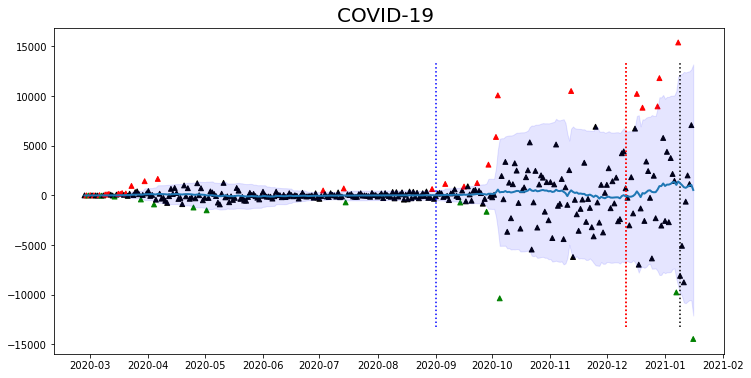

In [58]:
plot_LU(df_UK_1,'UK_diff_2')

In [124]:
plot_LU_plotly(df_UK_1,'UK_diff_2')

UK_diff_2


What correpondence among all the variant COVID, exactly 4 kinds reported until 202103-10? Not explicty shown above! Let us introduce the vaccine policy in UK; here [Kaggle data](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) used.

In [138]:
df_vac=pd.read_csv("country_vaccinations.csv")

In [131]:
df_vac.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [133]:
df_vac[df_vac.iso_code=='GBR'].head()

country iso_code        date  total_vaccinations  \
4878  United Kingdom      GBR  2020-12-13             86465.0   
4879  United Kingdom      GBR  2020-12-14                 0.0   
4880  United Kingdom      GBR  2020-12-15                 0.0   
4881  United Kingdom      GBR  2020-12-16                 0.0   
4882  United Kingdom      GBR  2020-12-17                 0.0   

      people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
4878            86465.0                      0.0                     0.0   
4879                0.0                      0.0                     0.0   
4880                0.0                      0.0                     0.0   
4881                0.0                      0.0                     0.0   
4882                0.0                      0.0                     0.0   

      daily_vaccinations  total_vaccinations_per_hundred  \
4878                 0.0                            0.13   
4879             84117.0                            0.00   
4880             84117.0                            0.00   
4881             84117.0                            0.00   
4882             84117.0                            0.00   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
4878                           0.13                                  0.0   
4879                           0.00                                  0.0   
4880                           0.00                                  0.0   
4881                           0.00                                  0.0   
4882                           0.00                                  0.0   

      daily_vaccinations_per_million                             vaccines  \
4878                             0.0  Oxford/AstraZeneca, Pfizer/BioNTech   
4879                          1239.0  Oxford/AstraZeneca, Pfizer/BioNTech   
4880                          1239.0  Oxford/AstraZeneca, Pfizer/BioNTech   
4881                          1239.0  Oxford/AstraZeneca, Pfizer/BioNTech   
4882                          1239.0  Oxford/AstraZeneca, Pfizer/BioNTech   

                           source_name  \
4878  Government of the United Kingdom   
4879  Government of the United Kingdom   
4880  Government of the United Kingdom   
4881  Government of the United Kingdom   
4882  Government of the United Kingdom   

                                         source_website  
4878  https://coronavirus.data.gov.uk/details/health...  
4879  https://coronavirus.data.gov.uk/details/health...  
4880  https://coronavirus.data.gov.uk/details/health...  
4881  https://coronavirus.data.gov.uk/details/health...  
4882  https://coronavirus.data.gov.uk/details/health...

In [139]:
df_vac.fillna(0, inplace = True)
df_vac['iso_code'].fillna('GBR', inplace=True)
df_vac.drop(df_vac.index[df_vac['iso_code'] == 0], inplace = True)

In [140]:
df_vac.drop(["source_name","source_website","people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred"],axis=1, inplace=True)


In [141]:
df_UK_vac= df_vac[df_vac["iso_code"] == 'GBR'].copy()
df_UK_vac

country iso_code        date  total_vaccinations  \
4878  United Kingdom      GBR  2020-12-13             86465.0   
4879  United Kingdom      GBR  2020-12-14                 0.0   
4880  United Kingdom      GBR  2020-12-15                 0.0   
4881  United Kingdom      GBR  2020-12-16                 0.0   
4882  United Kingdom      GBR  2020-12-17                 0.0   
...              ...      ...         ...                 ...   
4954  United Kingdom      GBR  2021-02-27          20885683.0   
4955  United Kingdom      GBR  2021-02-28          21091267.0   
4956  United Kingdom      GBR  2021-03-01          21322717.0   
4957  United Kingdom      GBR  2021-03-02          21599027.0   
4958  United Kingdom      GBR  2021-03-03          21946433.0   

      people_vaccinated  daily_vaccinations  total_vaccinations_per_hundred  \
4878            86465.0                 0.0                            0.13   
4879                0.0             84117.0                            0.00   
4880                0.0             84117.0                            0.00   
4881                0.0             84117.0                            0.00   
4882                0.0             84117.0                            0.00   
...                 ...                 ...                             ...   
4954         20089551.0            384059.0                           30.77   
4955         20275451.0            391872.0                           31.07   
4956         20478619.0            394821.0                           31.41   
4957         20703615.0            383864.0                           31.82   
4958         20982571.0            364840.0                           32.33   

                                 vaccines  
4878  Oxford/AstraZeneca, Pfizer/BioNTech  
4879  Oxford/AstraZeneca, Pfizer/BioNTech  
4880  Oxford/AstraZeneca, Pfizer/BioNTech  
4881  Oxford/AstraZeneca, Pfizer/BioNTech  
4882  Oxford/AstraZeneca, Pfizer/BioNTech  
...                                   ...  
4954  Oxford/AstraZeneca, Pfizer/BioNTech  
4955  Oxford/AstraZeneca, Pfizer/BioNTech  
4956  Oxford/AstraZeneca, Pfizer/BioNTech  
4957  Oxford/AstraZeneca, Pfizer/BioNTech  
4958  Oxford/AstraZeneca, Pfizer/BioNTech  

[81 rows x 8 columns]

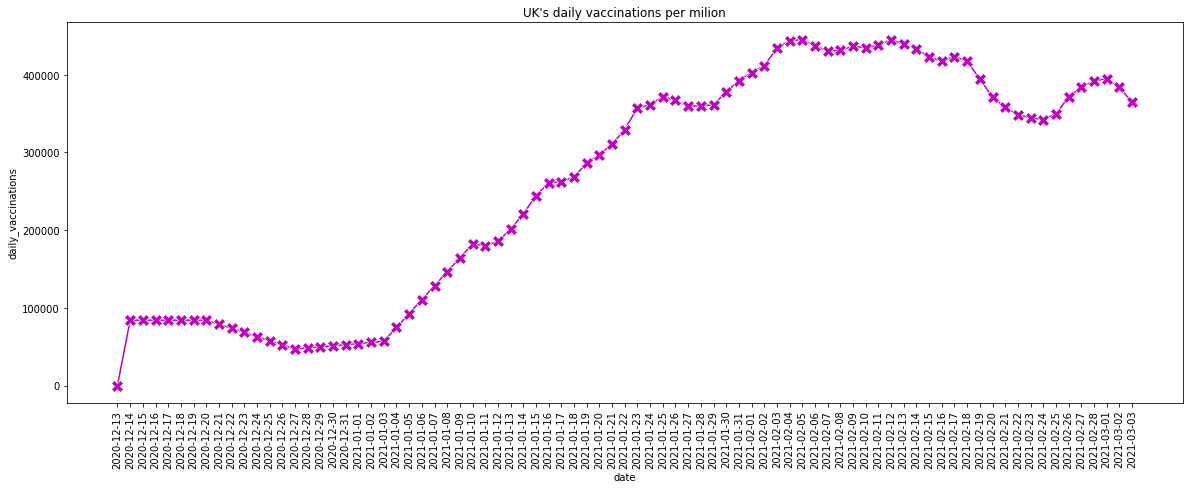

In [142]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_UK_vac,x="date",y="daily_vaccinations",marker='X',markersize =12, color = 'm');

plt.xticks(rotation=90);
plt.title("UK's daily vaccinations per milion");

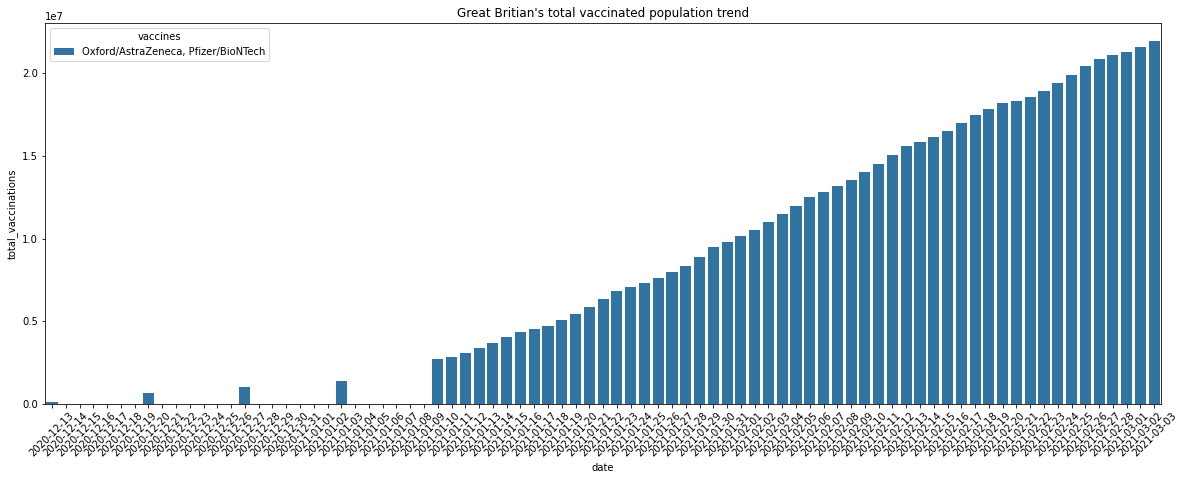

In [143]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_UK_vac, y="total_vaccinations",x="date",hue = 'vaccines')

plt.title("Great Britian's total vaccinated population trend")
plt.xticks(rotation=45);

In [148]:
df_UK_vac[df_UK_vac['vaccines']=='Pfizer/BioNTech']

Empty DataFrame
Columns: [country, iso_code, date, total_vaccinations, people_vaccinated, daily_vaccinations, total_vaccinations_per_hundred, vaccines]
Index: []

In [182]:
df_UK_vac_1=df_UK_vac.copy()
df_UK_vac_1.index=df_UK_vac['date']

# convert date from object format to datetime
df_UK_vac_1.index = pd.to_datetime(df_UK_vac_1.index)

In [183]:
df_UK_vac_1.iloc[:5,3:]

total_vaccinations  people_vaccinated  daily_vaccinations  \
date                                                                    
2020-12-13             86465.0            86465.0                 0.0   
2020-12-14                 0.0                0.0             84117.0   
2020-12-15                 0.0                0.0             84117.0   
2020-12-16                 0.0                0.0             84117.0   
2020-12-17                 0.0                0.0             84117.0   

            total_vaccinations_per_hundred  \
date                                         
2020-12-13                            0.13   
2020-12-14                            0.00   
2020-12-15                            0.00   
2020-12-16                            0.00   
2020-12-17                            0.00   

                                       vaccines  
date                                             
2020-12-13  Oxford/AstraZeneca, Pfizer/BioNTech  
2020-12-14  Oxford/AstraZeneca, Pfizer/BioNTech  
2020-12-15  Oxford/AstraZeneca, Pfizer/BioNTech  
2020-12-16  Oxford/AstraZeneca, Pfizer/BioNTech  
2020-12-17  Oxford/AstraZeneca, Pfizer/BioNTech

In [232]:
merged_df = df_UK.merge(df_UK_vac_1.iloc[:,3:], left_index=True, right_index=True)

# Visualisations 
## "UK Diff-2" and "Vaccine", coincided and apart

In [243]:
from plotly.subplots import make_subplots
#import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df['UK_diff_2'],name='UK diff_2'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=merged_df.index, y=merged_df['total_vaccinations'],name='total_vaccinations'),
              row=2, col=1)


# Add figure title with align
fig.update_layout(
    title_text="<b>COVID-19 Vaccined Progress in UK</b>", title_x=0.22
)

In [242]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces 1 with repect to left y-axes
fig.add_trace(
    go.Scatter(x=merged_df.index, y=merged_df['UK_diff_2'],name='UK diff_2'),
    secondary_y=False,
)

# Add traces 2 with repect to right y-axes
fig.add_trace(
    go.Scatter(x=merged_df.index, y=merged_df['total_vaccinations'],name='total_vaccinations'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>COVID-19 Vaccined Progress in UK</b>", title_x=0.22
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>UK Diff-2</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>total_vaccinations</b>", secondary_y=True)


In [245]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces 1 with repect to left y-axes
fig.add_trace(
    go.Scatter(x=merged_df.index, y=merged_df['UK_diff_1'],name='UK diff_1'),
    secondary_y=False,
)

# Add traces 2 with repect to right y-axes
fig.add_trace(
    go.Scatter(x=merged_df.index, y=merged_df['total_vaccinations'],name='total_vaccinations'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>COVID-19 Vaccined Progress in UK</b>", title_x=0.22
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>UK Diff-1</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>total_vaccinations</b>", secondary_y=True)


In [230]:
from scipy.stats import pearsonr 

list1 = merged_df[20:]['UK']
list2 = merged_df[20:]['total_vaccinations']
 
    
# Apply the pearsonr() 
corr, _ = pearsonr(list1, list2) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: 0.940


In [244]:
merged_df[20:][['UK','UK_diff_1','total_vaccinations']].corr()

UK  UK_diff_1  total_vaccinations
UK                  1.000000  -0.969946            0.940496
UK_diff_1          -0.969946   1.000000           -0.942967
total_vaccinations  0.940496  -0.942967            1.000000

Conclusion
---
1. As while as  vaccinations processing in UK, COVID-19 seems to be controled as expected.
2. As reported, Oxford/AstraZeneca, Known as AZ, is worked for South Africa variant prevantion, and it is just the majority Vaccine in UK. 

Note
---
As known mathematical theory, continuous $Y$ and $X$ is in decreasing relation if
$$\frac{\partial Y}{\partial X}<0$$
reference the last figure.

TCN
---
TCN is lso known as Temporal Convolution Network, introduced by 2018. It owns the following advantages:
1. based on fixed-size of pass-memory (like `AR` part in `ARIMA` model), it is suitable for time-series data sets.
2. Although it is deep-learning algorithm, it is convergent faster than other Deep Learning ones.


# Keras-TCN

In [284]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm

from tcn import TCN

In [324]:
df_UK.tail()

UK  UK_diff_1  UK_diff_2  UK_diff_3  UK_diff_4  pred_ARIMA
2021-02-28  4188827     6055.0    -1402.0     -271.0     -572.0     5110628
2021-03-01  4194289     5462.0     -593.0      809.0     1080.0     5153548
2021-03-02  4200700     6411.0      949.0     1542.0      733.0     5196542
2021-03-03  4207120     6420.0        9.0     -940.0    -2482.0     5239622
2021-03-04  4213764     6644.0      224.0      215.0     1155.0     5282801

In [325]:
lookback_window = 22 

# Convert data to X, y numpy format
comfirmed= df_UK[['UK']].values

x = []
y = []
for i in tqdm(range(lookback_window, len(comfirmed))):
    x.append(comfirmed[i - lookback_window:i])
    y.append(comfirmed[i])

In [326]:
# Generate Array of list x and y

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(386, 22, 1)
(386, 1)


In [327]:
# Model Design

i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 22, 1)]           0         
_________________________________________________________________
tcn_2 (TCN)                  (None, 64)                91136     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________


In [328]:
model.compile('adam','mae')

In [329]:
# Model training

print('Train...')
model.fit(x, y, epochs=100,verbose=False)

Train...


In [330]:
predict = model.predict(x)


In [331]:
len(df_UK)

408

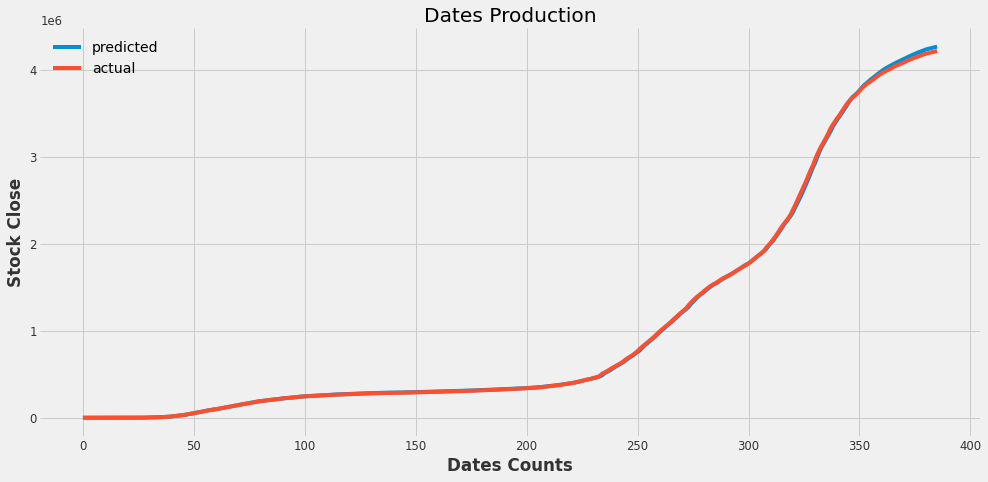

In [332]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Dates Production')
plt.legend(['predicted', 'actual'])
plt.xlabel("Dates Counts")
plt.ylabel("Stock Close")
plt.show()

In [333]:
df_UK['UK'].tail()

2021-02-28    4188827
2021-03-01    4194289
2021-03-02    4200700
2021-03-03    4207120
2021-03-04    4213764
Name: UK, dtype: int64

In [313]:
df_TCN=df_UK.copy()

In [334]:
df_TCN['pred_TCN']=df_TCN['UK']

In [336]:
predict.flatten().astype(int)

array([     16,      17,      17,      18,      18,      19,      20,
            20,      23,      24,      25,      31,      30,      35,
            38,      47,      63,      63,     122,     165,     237,
           299,     347,     471,     504,     569,     797,    1159,
          1739,    2304,    2795,    3095,    3728,    4526,    5415,
          6681,    7712,    9079,   10278,   11842,   15044,   17410,
         20388,   23868,   26998,   29637,   32974,   37989,   42230,
         47419,   52556,   57684,   62096,   66314,   71524,   76936,
         82248,   87060,   91412,   95251,   98448,  102258,  106790,
        111548,  116049,  121186,  126385,  130543,  135702,  140547,
        145912,  150715,  155889,  159866,  163514,  168644,  173384,
        178522,  183050,  187806,  190945,  193619,  196980,  200856,
        204416,  207649,  210239,  211995,  214049,  217760,  221327,
        224011,  225925,  228561,  230964,  233115,  235889,  239162,
        241771,  244

In [337]:
df_TCN['pred_TCN'][-len(y):]=predict.flatten().astype(int)

<ipython-input-337-cfb85c797757>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [338]:
df_TCN.tail()

UK  UK_diff_1  UK_diff_2  UK_diff_3  UK_diff_4  pred_ARIMA  \
2021-02-28  4188827     6055.0    -1402.0     -271.0     -572.0     5110628   
2021-03-01  4194289     5462.0     -593.0      809.0     1080.0     5153548   
2021-03-02  4200700     6411.0      949.0     1542.0      733.0     5196542   
2021-03-03  4207120     6420.0        9.0     -940.0    -2482.0     5239622   
2021-03-04  4213764     6644.0      224.0      215.0     1155.0     5282801   

            pred_TCN  
2021-02-28   4238724  
2021-03-01   4245081  
2021-03-02   4250723  
2021-03-03   4257521  
2021-03-04   4264078

<AxesSubplot:>

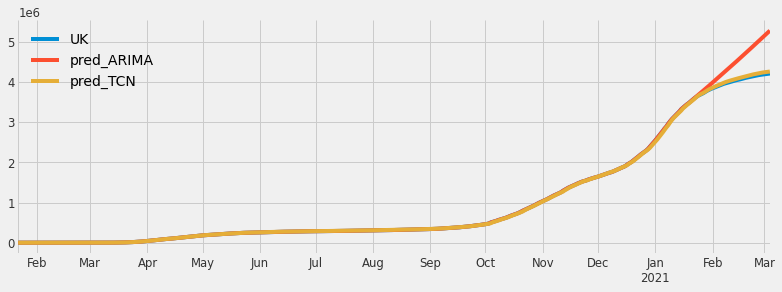

In [340]:
df_TCN[['UK','pred_ARIMA','pred_TCN']].plot(figsize=[12,4])

In [342]:
fig=ex.line(df_TCN[['UK','pred_ARIMA','pred_TCN']])
fig.show()

The result of TCN is absolutely better than others. 

# LPPLS, BuBBle Prediction


The LPPLS model provides a flexible framework to detect bubbles and predict regime changes of a financial asset. A bubble is defined as a faster-than-exponential increase in asset price, that reflects positive feedback loop of higher return anticipations competing with negative feedback spirals of crash expectations. It models a bubble price as a power law with a finite-time singularity decorated by oscillations with a frequency increasing with time.

Here is the model:
$$E[\ln p(t)] = A +B(t_c-t)^m+C(t_c-t)^m\cos(\omega(t_c-t)-\phi)$$
where:
- $E[\ln p(t)]$: expected log price at the date of the termination of the bubble
- $t_c$: critical time (date of termination of the bubble and transition in a new regime)
- $A$: expected log price at the peak when the end of the bubble is reached at Critical Time
- $B$: amplitude of the power law acceleration
- $C$ : amplitude of the log-periodic oscillations
- $m$: degree of the super exponential growth
- $\omega$: scaling ratio of the temporal hierarchy of oscillations
- $\phi$: time scale of the oscillations

The model has three components representing a bubble. The first, $A +B(t_c-t)^m$, handles the hyperbolic power law. For m < 1 when the price growth becomes unsustainable, and at Critical Time the growth rate becomes infinite. The second term, $B(t_c-t)^m$, controls the amplitude of the oscillations. It drops to zero at the critical time Critical Time. The third term, $C(t_c-t)^m\cos(\omega(t_c-t)-\phi)$, models the frequency of the osciallations. They become infinite at Critical Time.


In [343]:
from lppls import lppls

In [344]:
df_UK.head()

UK  UK_diff_1  UK_diff_2  UK_diff_3  UK_diff_4  pred_ARIMA
2020-01-22   0        0.0        0.0        0.0        0.0           0
2020-01-23   0        0.0        0.0        0.0        0.0           0
2020-01-24   0        0.0        0.0        0.0        0.0           0
2020-01-25   0        0.0        0.0        0.0        0.0           0
2020-01-26   0        0.0        0.0        0.0        0.0           0

In [346]:
data= np.log1p(df_UK['UK'].values)
time = np.linspace(0, len(df_UK)-1, len(df_UK))
MAX_SEARCHES = 25

# create Mx2 matrix (expected format for LPPLS observations)
observations = np.array([time, data])

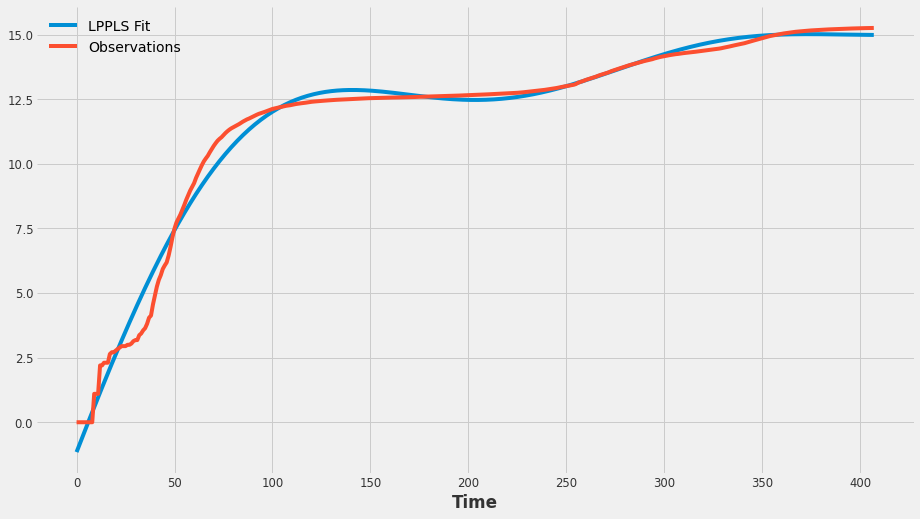

In [347]:
# instantiate a new LPPLS model with the S&P 500 dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2 = lppls_model.fit(observations, MAX_SEARCHES, minimizer='Nelder-Mead')

# visualize the fit
lppls_model.plot_fit()

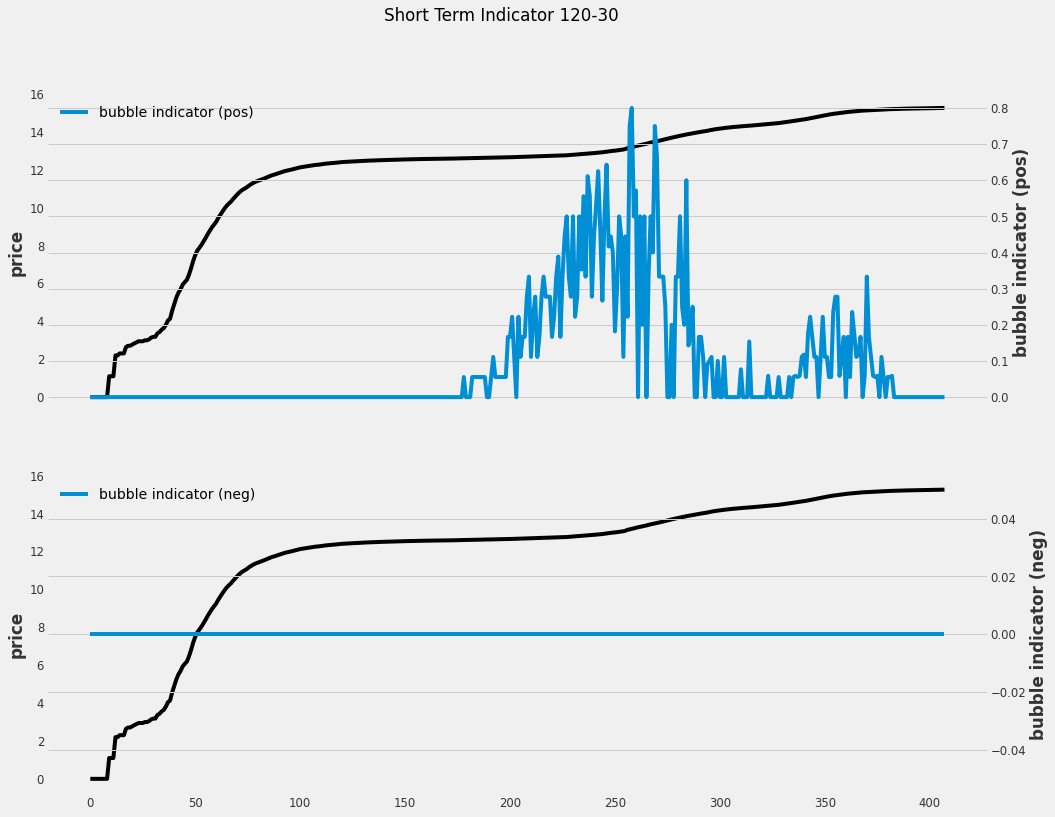

In [348]:
# define custom filter condition
filter_conditions_config = [
  {'condition_1':[
      (0.0, 0.1), # tc_range
      (0,1), # m_range
      (4,25), # w_range
      2.5, # O_min
      0.5, # D_min
  ]},
]

# compute the confidence indicator
res = lppls_model.mp_compute_indicator(
    workers=4, 
    window_size=120, 
    smallest_window_size=30, 
    increment=5, 
    max_searches=25,
    filter_conditions_config=filter_conditions_config
)

lppls_model.plot_confidence_indicators(res, condition_name='condition_1', title='Short Term Indicator 120-30')


In [349]:
res_df=lppls_model.res_to_df(res, condition_name='condition_1')


price  pos_conf  neg_conf  \
idx                                    
403.0  15.247932       0.0       0.0   
404.0  15.249235       0.0       0.0   
405.0  15.250762       0.0       0.0   
406.0  15.252289       0.0       0.0   
407.0  15.253867       0.0       0.0   

                                              fit_params  
idx                                                       
403.0  {'tc': 402.50817678346647, 'm': 1.212857033013...  
404.0  {'tc': 407.93132402999987, 'm': 1.907232109567...  
405.0  {'tc': 404.5941062563244, 'm': 1.6626663052080...  
406.0  {'tc': 405.2114347416867, 'm': 1.7268157117296...  
407.0  {'tc': 410.48955164521374, 'm': 1.861008501647...

In [370]:
res_df.iloc[240:250,:]

price  pos_conf  neg_conf  \
idx                                    
240.0  12.869840  0.444444       0.0   
241.0  12.881178  0.529412       0.0   
242.0  12.891054  0.625000       0.0   
243.0  12.902028  0.461538       0.0   
244.0  12.914259  0.266667       0.0   
245.0  12.929380  0.500000       0.0   
246.0  12.945368  0.642857       0.0   
247.0  12.961655  0.416667       0.0   
248.0  12.975764  0.444444       0.0   
249.0  12.988878  0.400000       0.0   

                                              fit_params  
idx                                                       
240.0  {'tc': 241.09959486712924, 'm': 0.394659314509...  
241.0  {'tc': 244.99274535458565, 'm': 0.224072730927...  
242.0  {'tc': 246.61784833355938, 'm': 0.191524006057...  
243.0  {'tc': 248.2677714187815, 'm': 0.1702976479109...  
244.0  {'tc': 247.24489704032928, 'm': 0.301016847379...  
245.0  {'tc': 249.05979367784627, 'm': 0.313291873357...  
246.0  {'tc': 247.1734390983806, 'm': 0.4310777540274...  
247.0  {'tc': 249.47867139896138, 'm': 0.350393424372...  
248.0  {'tc': 250.3962308795535, 'm': 0.3480911689979...  
249.0  {'tc': 251.08775868818833, 'm': 0.365991442566...

<AxesSubplot:xlabel='idx'>

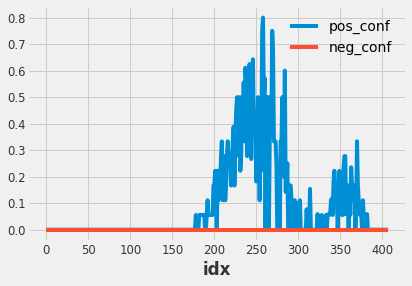

In [351]:
res_df[['pos_conf','neg_conf']].plot()

In [353]:
df_UK_lppls=df_UK.copy()

In [357]:
df_UK_lppls['pos_conf']=res_df['pos_conf'].values

In [362]:
def LR_fig(df_,L,R):
    df=df_.copy()
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces 1 with repect to left y-axes
    fig.add_trace(
       go.Scatter(x=df.index, y=df[L],name=L),
       secondary_y=False,
    )

    # Add traces 2 with repect to right y-axes
    fig.add_trace(
        go.Scatter(x=df.index, y=df[R],name=R),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text="<b>COVID-19 in UK</b>", title_x=0.22
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Date")

    # Set y-axes titles
    fig.update_yaxes(title_text=L, secondary_y=False)
    fig.update_yaxes(title_text=R, secondary_y=True)
    return fig

In [369]:
LR_fig(df_UK_lppls,'UK_diff_1','pos_conf')

Chage Point Finder
---
Change point detection (or CPD)is applicable across an array of industries, including finance, manufacturing quality control, energy, medical diagnostics, and human activity analysis to detects abrupt shifts in time series trends.

CPD is great for the following use cases:

1. Detecting anomalous sequences/states in a time series
2. Detecting the average velocity of unique states in a time series
3. Detecting a sudden change in a time series state in real time

There are two different kinds of alogrithms of CPD: one is offline and the other is online. Change point detection approaches are “offline” when they don’t use live streaming data, and require the complete time series for statistical analysis. In contrast with offline change point detection, online change point detection is used on live-streaming time series, usually to for the purpose of constant monitoring or immediate anomaly detection. 

1. Offline CPD, [ruptures](https://github.com/deepcharles/ruptures)
2. Online CPD, [changefinder](https://github.com/shunsukeaihara/changefinder)


The ruptures package provides four  search algorithms to find out change points:
1. Pruned Exact Linear Time (PELT) search method, detects change points through the minimization of costs and generally produces quick and consistent results.
2. Binary segmentation search method works by iteratively applying a single change point method to the entire sequence to determine if a split exists. If a split is detected, then the sequence splits into two sub-sequences.
3. Window-based search method computes the discrepancy between two adjacent windows that move along with signal y” (6). When the two windows are highly dissimilar, a high discrepancy between the two values occurs, which is indicative of a change point. 
4. Dynamic programming search method is an exact method, which has a considerable computational cost of $O(Qn^2 )$



In [371]:
import ruptures as rpt

Text(0.5, 1.0, 'Change Point Detection: Pelt Search Method')

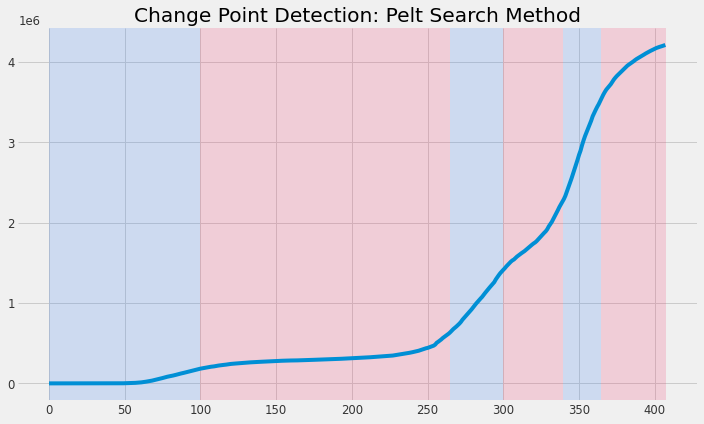

In [372]:
points=np.array(df_UK['UK'])
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')

In [381]:
def cpd_rpt(df_,f,models=['rbf'],windows=20):
    df=df_.copy()
    points=np.array(df[f])
    for model in models:
        if model=='rbf':
           algo = rpt.Pelt(model=model).fit(points)
           result = algo.predict(pen=10)
           rpt.display(points, result, figsize=(10, 4))
           labels=list(df.index.astype('str'))
           label=list( labels[i-1] for i in result )
            
           plt.xticks(ticks=result,labels=label,rotation=30)
           plt.title('Change Point Detection: Pelt Search Method')
           plt.xlim(0,len(df)) 
        elif(model=='l2'):
           algo = rpt.Binseg(model=model).fit(points)
           result = algo.predict(pen=10)
           rpt.display(points, result, figsize=(10, 4))
           labels=list(df.index.astype('str'))
           label=list( labels[i-1] for i in result )
            
           plt.xticks(ticks=result,labels=label,rotation=90)
           plt.title('Change Point Detection: Binary Segmentation Search Method')
           plt.xlim(0,len(df))  
        elif(model=='l2-window'):
           model='l2'
           algo = rpt.Window(width=windows, model=model).fit(points)
           result = algo.predict(pen=10)
           rpt.display(points, result, figsize=(10, 4))
           labels=list(df.index.astype('str'))
           label=list( labels[i-1] for i in result )
            
           plt.xticks(ticks=result,labels=label,rotation=20)
           plt.title('Change Point Detection: Window-Based (size: %s) Search Method' %windows)
           plt.xlim(0,len(df))  
        else:
           model = "l1"  
           algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
           result = algo.predict(n_bkps=10)
           rpt.show.display(points, result, figsize=(10, 4))
           labels=list(df.index.astype('str'))
           label=list( labels[i-1] for i in result )
            
           plt.xticks(ticks=result,labels=label,rotation=20)
           plt.title('Change Point Detection: Dynamic Programming Search Method')
           plt.xlim(0,len(df)) 

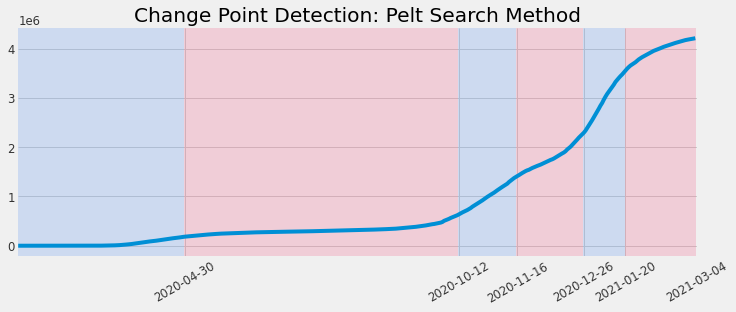

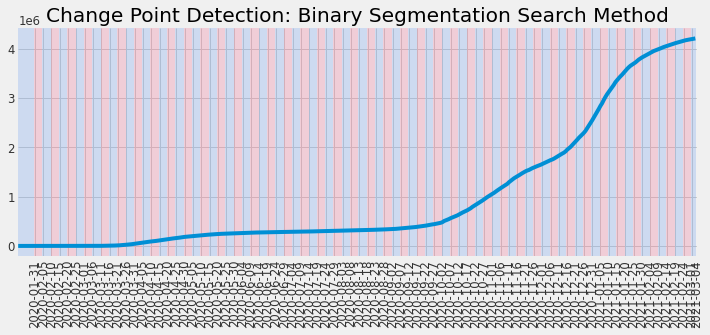

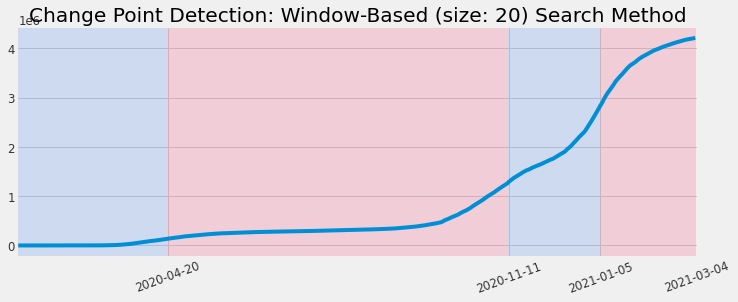

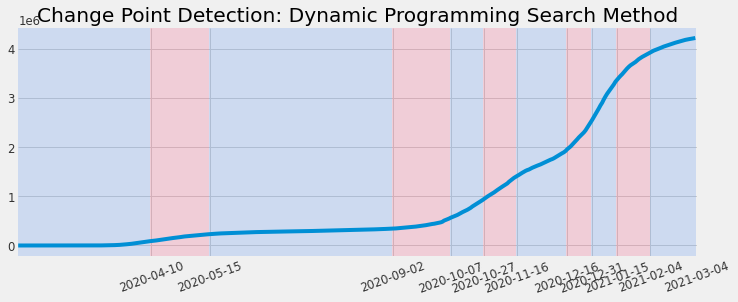

In [382]:
cpd_rpt(df_UK,'UK',models=['rbf','l2','l2-window','l1'])

# changefinder package,  

useing SDAR modelling, or sequentially discounting autoregression time series modelling, is specifically for online change point detection. SDAR is an extension of autoregressive (AR) modelling, where older data points in the sequence are ‘discounted’, i.e. are less important than more recent values in the sequence. 

changefinder.ChangeFinder(r=0.1, order=1, smooth=7)

- r: Factors of the failure-oblivious AR model
- order:  orders of the failure-oblivious AR model 
- smooth:  length of window for moving average smoothing of calculated outlier scores

In [383]:
import changefinder 

In [384]:
def cpd_online(df_,f,r=0.05, order=1, smooth=7,normalize=True):
    df=df_.copy()
    if normalize==True:
       points=df[f].apply(lambda x:np.log1p(x)).values
    else:
       points=df[f].values
    
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)

    ret = []
    for i in points:
        score = cf.update(i)
        ret.append(score)

    fig = plt.figure(figsize=[10,4])
    ax = fig.add_subplot(111)
    ax.plot(df.index,ret)
    ax2 = ax.twinx()
    ax2.plot(df.index,points,'r')

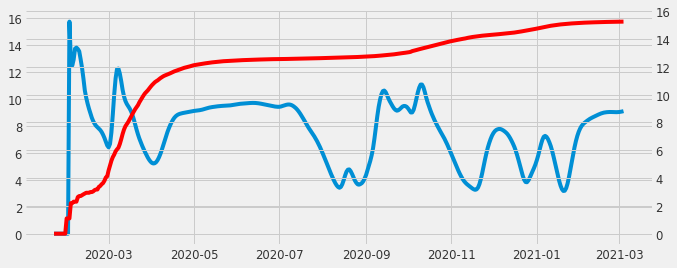

In [386]:
cpd_online(df_UK,'UK',r=0.1, order=1, smooth=7)


# SIR Model


# [covsirphy](https://lisphilar.github.io/covid19-sir/)

## SIR-F model
In the initial phase of COVID-19 outbreak, many cases were confirmed after they died. To consider this issue, "S + I $\to$ Fatal + I" will be added to the model. When $\alpha_{1}=0$, SIR-F model will be the same as SIR-D model.

<font size=+1>
\begin{align*}
\mathrm{S} \overset{\beta I}{\longrightarrow} \mathrm{S}^\ast \overset{\alpha_1}{\longrightarrow}\ & \mathrm{F}    \\
\mathrm{S}^\ast \overset{1 - \alpha_1}{\longrightarrow}\ & \mathrm{I} \overset{\gamma}{\longrightarrow} \mathrm{R}    \\
& \mathrm{I} \overset{\alpha_2}{\longrightarrow} \mathrm{F}    \\
\end{align*}
</font>
Variables:  

* $\mathrm{S}$: Susceptible (= Population - Confirmed)  
* $\mathrm{S}^\ast$: Confirmed and un-categorized  
* $\mathrm{I}$: Confirmed and categorized as Infected  
* $\mathrm{R}$: Confirmed and categorized as Recovered  
* $\mathrm{F}$: Confirmed and categorzied as Fatal  

Parameters:  

* $\alpha_1$: Direct fatality probability of $\mathrm{S}^\ast$ (non-dimensional) 
* $\alpha_2$: Mortality rate of Infected cases $\mathrm{[1/min]}$  
* $\beta$: Effective contact rate $\mathrm{[1/min]}$  
* $\gamma$: Recovery rate $\mathrm{[1/min]}$  

Notes on $\mathrm{S}^\ast$ variable:  
$\mathrm{S}^\ast$ describes the cases who are actually carriers of the disease without anyone (including themselves) knowing about it, who either die and they are confirmed positive after death, while some others are moved to infected after being confirmed.

In JHU-style dataset, we know the number of cases who were confirmed with COVID-19, but we do not know the number of died cases who died without COVID-19.
Essentially $\mathrm{S}^\ast$ serves as an auxiliary compartment in SIR-F model to separate the two death situations and insert a probability factor of {$\alpha_1$, $1 - \alpha_1$}.

Notes on the difference of SIR-D and SIR-F model:  
$\alpha_1$ is small at this time because performance of PCR tests was improved, but we can use SIR-F model rather than SIR-D model as an enhanced model even now becase $\alpha_1$ can be 0 in the ODE model.


### Non-dimensional SIR-F model
Set $(S, I, R, F) = N \times (x, y, z, w)$ and $(T, \alpha_1, \alpha_2, \beta, \gamma) = (\tau t, \theta, \tau^{-1} \kappa, \tau^{-1} \rho, \tau^{-1} \sigma)$.  
This results in the ODE  
\begin{align*}
& \frac{\mathrm{d}x}{\mathrm{d}t}= - \rho x y  \\
& \frac{\mathrm{d}y}{\mathrm{d}t}= \rho (1-\theta) x y - (\sigma + \kappa) y  \\
& \frac{\mathrm{d}z}{\mathrm{d}t}= \sigma y  \\
& \frac{\mathrm{d}w}{\mathrm{d}t}= \rho \theta x y + \kappa y  \\
\end{align*}

### Atttack Ratio, $R_t$
of SIR-F model is defined as follows:
$$R_t=\frac{\rho(1−\theta)}{\sigma+\kappa}=\frac{\beta(1−\alpha_1)}{\gamma+\alpha_2}$$

 


In [387]:
import covsirphy as cs
cs.__version__

'2.17.0'

In [389]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


In [391]:
cs.Scenario?

In [399]:
snl = cs.Scenario(jhu_data, population_data, country="UnitedKingdom", province=None)

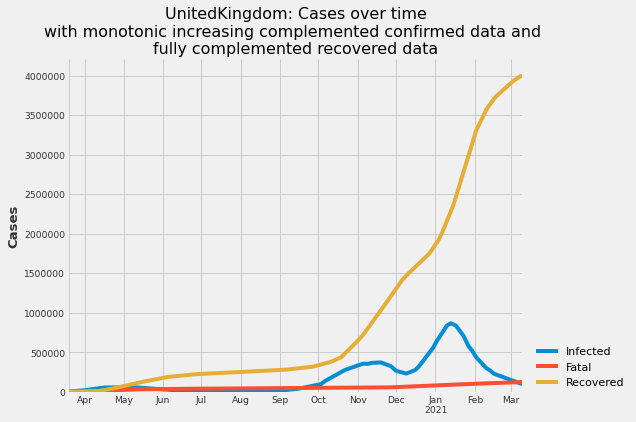

Date  Infected   Fatal  Recovered
0   2020-03-19      2709     162         46
1   2020-03-20      3284     194         76
2   2020-03-21      4124     252        102
3   2020-03-22      4641     288        142
4   2020-03-23      5388     364        182
..         ...       ...     ...        ...
352 2021-03-06    125069  124419    3963855
353 2021-03-07    118670  124501    3975349
354 2021-03-08    113356  124566    3985310
355 2021-03-09    109272  124797    3994929
356 2021-03-10     98808  124797    4005393

[357 rows x 4 columns]

In [401]:
snl.records()

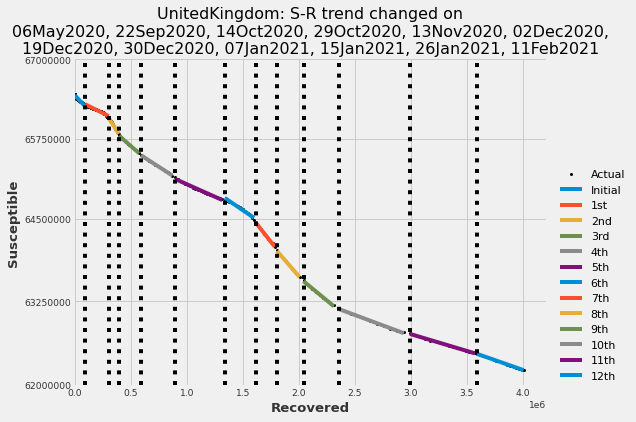

Type      Start        End  Population
0th   Past  03Mar2020  05May2020    66460344
1st   Past  06May2020  21Sep2020    66460344
2nd   Past  22Sep2020  13Oct2020    66460344
3rd   Past  14Oct2020  28Oct2020    66460344
4th   Past  29Oct2020  12Nov2020    66460344
5th   Past  13Nov2020  01Dec2020    66460344
6th   Past  02Dec2020  18Dec2020    66460344
7th   Past  19Dec2020  29Dec2020    66460344
8th   Past  30Dec2020  06Jan2021    66460344
9th   Past  07Jan2021  14Jan2021    66460344
10th  Past  15Jan2021  25Jan2021    66460344
11th  Past  26Jan2021  10Feb2021    66460344
12th  Past  11Feb2021  10Mar2021    66460344

In [404]:
# S-R trend analysis
snl.trend().summary()

In [405]:
# Parameter estimation of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...
	12th phase (11Feb2021 - 10Mar2021): finished  516 trials in 0 min 20 sec
Completed optimization. Total: 2 min 26 sec


In [406]:
snl.summary()

Type      Start        End  Population    ODE    Rt     theta     kappa  \
0th   Past  03Mar2020  05May2020    66460344  SIR-F  4.48  0.167472  0.000046   
1st   Past  06May2020  21Sep2020    66460344  SIR-F  0.82  0.063801  0.000123   
2nd   Past  22Sep2020  13Oct2020    66460344  SIR-F  2.59  0.004514  0.000014   
3rd   Past  14Oct2020  28Oct2020    66460344  SIR-F  1.62  0.001410  0.000191   
4th   Past  29Oct2020  12Nov2020    66460344  SIR-F  1.15  0.005511  0.000180   
5th   Past  13Nov2020  01Dec2020    66460344  SIR-F  0.86  0.018459  0.000066   
6th   Past  02Dec2020  18Dec2020    66460344  SIR-F  1.04  0.015622  0.000114   
7th   Past  19Dec2020  29Dec2020    66460344  SIR-F  2.25  0.000618  0.000262   
8th   Past  30Dec2020  06Jan2021    66460344  SIR-F  2.09  0.000114  0.000231   
9th   Past  07Jan2021  14Jan2021    66460344  SIR-F  1.43  0.005338  0.000180   
10th  Past  15Jan2021  25Jan2021    66460344  SIR-F  0.63  0.001268  0.000367   
11th  Past  26Jan2021  10Feb2021    66460344  SIR-F  0.54  0.004790  0.000517   
12th  Past  11Feb2021  10Mar2021    66460344  SIR-F  0.59  0.016445  0.000277   

           rho     sigma  tau  1/gamma [day]  1/alpha2 [day]  1/beta [day]  \
0th   0.035489  0.006549  360             38            5438             7   
1st   0.014659  0.016694  360             14            2039            17   
2nd   0.024565  0.009434  360             26           17575            10   
3rd   0.018887  0.011472  360             21            1309            13   
4th   0.017242  0.014763  360             16            1388            14   
5th   0.013721  0.015662  360             15            3778            18   
6th   0.018415  0.017342  360             14            2193            13   
7th   0.022257  0.009635  360             25             955            11   
8th   0.022281  0.010418  360             23            1080            11   
9th   0.017498  0.011964  360             20            1388            14   
10th  0.012334  0.019059  360             13             680            20   
11th  0.012911  0.023326  360             10             483            19   
12th  0.013193  0.021603  360             11             902            18   

      alpha1 [-]     RMSLE  Trials       Runtime  
0th        0.167  0.616952    1593  1 min 30 sec  
1st        0.064  0.376511    2137  2 min  0 sec  
2nd        0.005  0.038069     194  0 min 10 sec  
3rd        0.001  0.021611     195  0 min 10 sec  
4th        0.006  0.012611     195  0 min 10 sec  
5th        0.018  0.035163     977  1 min  0 sec  
6th        0.016  0.047294    1816  1 min 40 sec  
7th        0.001  0.017238     982  1 min  0 sec  
8th        0.000  0.009672     340  0 min 20 sec  
9th        0.005  0.013654     180  0 min 10 sec  
10th       0.001  0.019002     840  0 min 50 sec  
11th       0.005  0.014256     174  0 min 10 sec  
12th       0.016  0.018270     516  0 min 20 sec

In [407]:
# cs.SIRF.PARAMETERS: SIR-F modelのパラメータ名リスト
cols = ["Start", "End", "ODE", "tau", *cs.SIRF.PARAMETERS]
snl.summary(columns=cols)

Start        End    ODE  tau     theta     kappa       rho     sigma
0th   03Mar2020  05May2020  SIR-F  360  0.167472  0.000046  0.035489  0.006549
1st   06May2020  21Sep2020  SIR-F  360  0.063801  0.000123  0.014659  0.016694
2nd   22Sep2020  13Oct2020  SIR-F  360  0.004514  0.000014  0.024565  0.009434
3rd   14Oct2020  28Oct2020  SIR-F  360  0.001410  0.000191  0.018887  0.011472
4th   29Oct2020  12Nov2020  SIR-F  360  0.005511  0.000180  0.017242  0.014763
5th   13Nov2020  01Dec2020  SIR-F  360  0.018459  0.000066  0.013721  0.015662
6th   02Dec2020  18Dec2020  SIR-F  360  0.015622  0.000114  0.018415  0.017342
7th   19Dec2020  29Dec2020  SIR-F  360  0.000618  0.000262  0.022257  0.009635
8th   30Dec2020  06Jan2021  SIR-F  360  0.000114  0.000231  0.022281  0.010418
9th   07Jan2021  14Jan2021  SIR-F  360  0.005338  0.000180  0.017498  0.011964
10th  15Jan2021  25Jan2021  SIR-F  360  0.001268  0.000367  0.012334  0.019059
11th  26Jan2021  10Feb2021  SIR-F  360  0.004790  0.000517  0.012911  0.023326
12th  11Feb2021  10Mar2021  SIR-F  360  0.016445  0.000277  0.013193  0.021603

In [ ]:
snl.history(target="rho", filename=None)

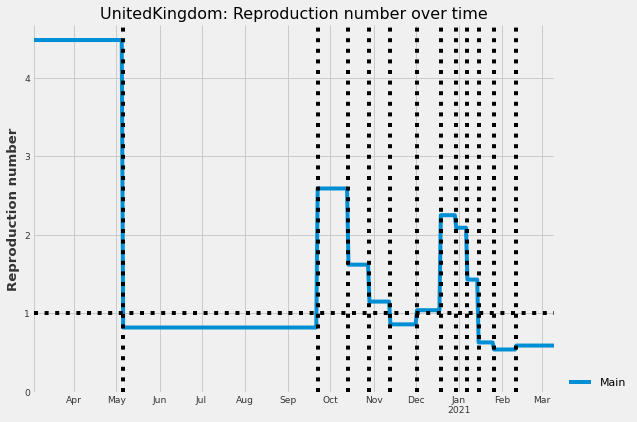

In [408]:
# History of reproduction number
_ = snl.history(target="Rt")

In [413]:
snl.get("Rt", phase="12th")

0.59

In [414]:
ex.line(snl.summary()['Rt'])

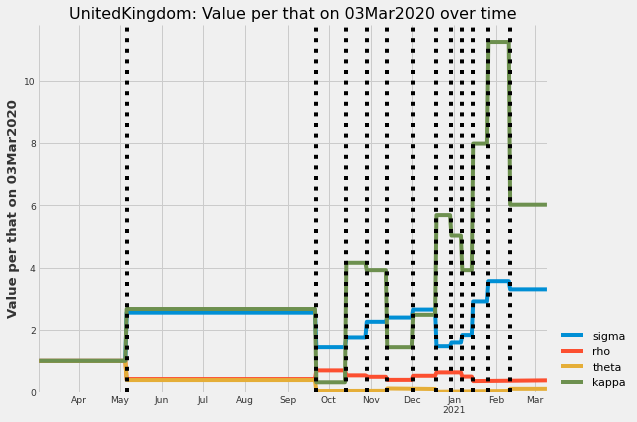

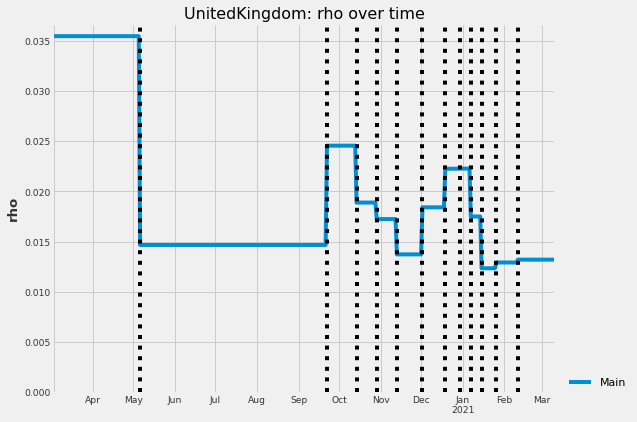

In [409]:
# History of parameters
_ = snl.history_rate()
_ = snl.history(target="rho")

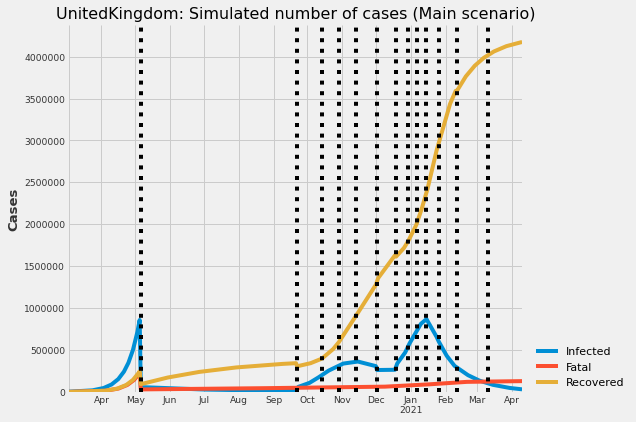

In [411]:
# Simulation for 30 days
snl.add(days=30)
_ = snl.simulate()

In [415]:
cols = ["Start", "End", "RMSLE", "Trials", "Runtime"]
snl.summary(columns=cols)

Start        End     RMSLE  Trials       Runtime
0th   03Mar2020  05May2020  0.616952  1593.0  1 min 30 sec
1st   06May2020  21Sep2020  0.376511  2137.0  2 min  0 sec
2nd   22Sep2020  13Oct2020  0.038069   194.0  0 min 10 sec
3rd   14Oct2020  28Oct2020  0.021611   195.0  0 min 10 sec
4th   29Oct2020  12Nov2020  0.012611   195.0  0 min 10 sec
5th   13Nov2020  01Dec2020  0.035163   977.0  1 min  0 sec
6th   02Dec2020  18Dec2020  0.047294  1816.0  1 min 40 sec
7th   19Dec2020  29Dec2020  0.017238   982.0  1 min  0 sec
8th   30Dec2020  06Jan2021  0.009672   340.0  0 min 20 sec
9th   07Jan2021  14Jan2021  0.013654   180.0  0 min 10 sec
10th  15Jan2021  25Jan2021  0.019002   840.0  0 min 50 sec
11th  26Jan2021  10Feb2021  0.014256   174.0  0 min 10 sec
12th  11Feb2021  10Mar2021  0.018270   516.0  0 min 20 sec
13th  11Mar2021  09Apr2021         -       -             -

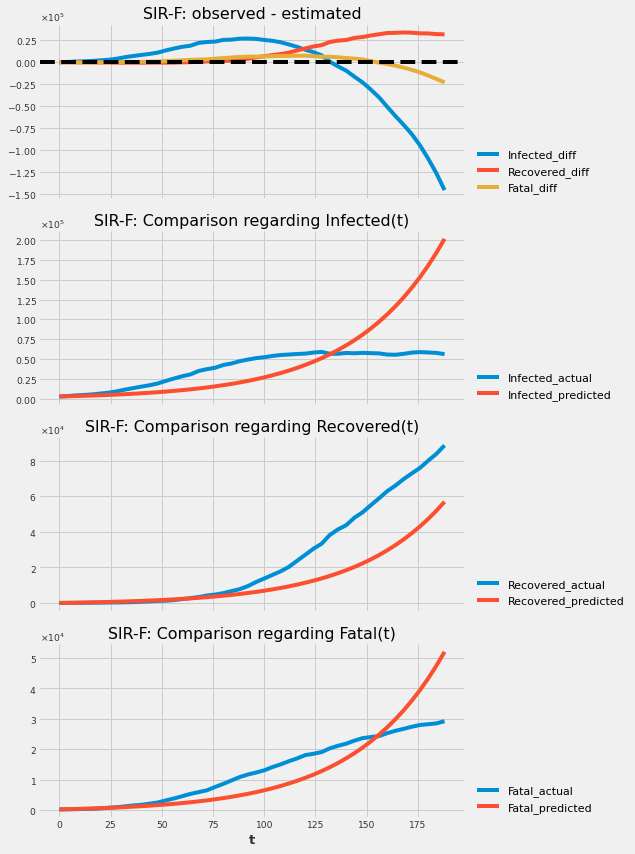

In [416]:
snl.estimate_accuracy(phase="0th", filename=None)